In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

In [2]:
dataset = pd.read_csv('data/personal_transactions.csv') # Importing the dataset

In [3]:
df = pd.DataFrame(dataset) 
df

,Date,Description,Amount,Transaction Type,Category,Account Name
0,01/01/2018,Amazon,11.11,debit,Shopping,Platinum Card
1,01/02/2018,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,01/02/2018,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,01/03/2018,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,01/04/2018,Netflix,11.76,debit,Movies & DVDs,Platinum Card
...,...,...,...,...,...,...
801,09/27/2019,Biweekly Paycheck,2250.00,credit,Paycheck,Checking
802,09/28/2019,BP,33.46,debit,Gas & Fuel,Platinum Card
803,09/28/2019,Sheetz,4.27,debit,Gas & Fuel,Platinum Card
804,09/30/2019,Starbucks,1.75,debit,Coffee Shops,Platinum Card


In [4]:
df.isnull().sum() # Checking any missing values
df.duplicated() # Checking any duplicate rows
df['Category'].value_counts() # Checking the Category

Category
Credit Card Payment       143
Groceries                 105
Restaurants                81
Utilities                  63
Shopping                   60
Gas & Fuel                 52
Paycheck                   46
Home Improvement           36
Coffee Shops               31
Alcohol & Bars             25
Internet                   21
Mortgage & Rent            21
Mobile Phone               21
Music                      21
Movies & DVDs              18
Auto Insurance             18
Fast Food                  16
Haircut                    13
Television                  8
Electronics & Software      4
Food & Dining               2
Entertainment               1
Name: count, dtype: int64

In [5]:
# Transfer Date into datetime format
df['Date'] = pd.to_datetime(df['Date'], 
 format = '%m/%d/%Y', 
 errors = 'coerce')

In [6]:
# Using IQR to remove the outliers
Q1 = df['Amount'].quantile(0.25) # Lower quartile
Q3 = df['Amount'].quantile(0.75) # Upper quartile
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

df=df[df['Amount'] <= threshold] # Dropping outliers

<Axes: title={'center': 'Amount after outliers are removed based on IQR'}, ylabel='Transaction Amount ($)'>

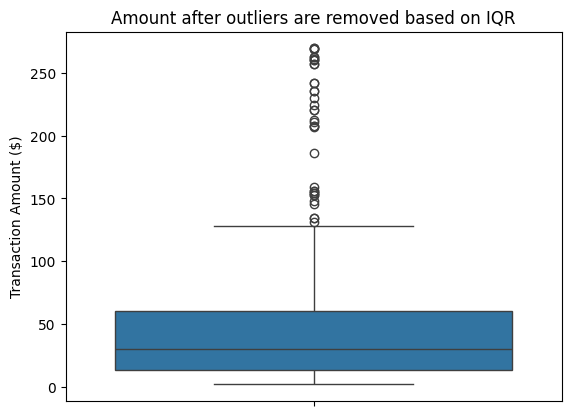

In [7]:
# Plotting graph using sns boxplot
outliers = sns.boxplot(y=df['Amount'])
outliers.set_title("Amount after outliers are removed based on IQR")
outliers.set_ylabel("Transaction Amount ($)")
outliers

In [8]:
# Mapping the current categories to the new categories
category_change = {
     # Food & Drink
    'Restaurants':     'Food & Drink',
    'Fast Food':       'Food & Drink',
    'Alcohol & Bars':  'Food & Drink',
    'Coffee Shops':    'Food & Drink',
    'Groceries':       'Food & Drink',
    'Food & Dining':   'Food & Drink',

    # Entertainment
    'Music':           'Entertainment',
    'Movies & DVDs':   'Entertainment',

    # Utilities & Bills
    'Utilities':       'Utilities & Bills',
    'Internet':        'Utilities & Bills',
    'Mobile Phone':    'Utilities & Bills',
    'Television':      'Utilities & Bills',

    # Transportation
    'Gas & Fuel':      'Transportation',
    'Auto Insurance':  'Transportation',

    # Shopping
    'Shopping':               'Shopping',
    'Electronics & Software': 'Shopping',
    'Home Improvement':       'Shopping',

    # Personal Care
    'Haircut':          'Personal Care'
}

# Grouping the categories with changing them
df['Category'].replace(category_change, inplace=True)

df['Category'].value_counts()


/tmp/ipykernel_28375/1253492670.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].replace(category_change, inplace=True)
/tmp/ipykernel_28375/1253492670.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'].replace(category_change, inplace=True)


Category
Food & Drink           260
Utilities & Bills      113
Shopping                96
Transportation          70
Credit Card Payment     55
Entertainment           40
Personal Care           13
Name: count, dtype: int64

In [9]:
df

,Date,Description,Amount,Transaction Type,Category,Account Name
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card
2,2018-01-02,Thai Restaurant,24.22,debit,Food & Drink,Silver Card
4,2018-01-04,Netflix,11.76,debit,Entertainment,Platinum Card
5,2018-01-05,American Tavern,25.85,debit,Food & Drink,Silver Card
6,2018-01-06,Hardware Store,18.45,debit,Shopping,Silver Card
...,...,...,...,...,...,...
800,2019-09-23,Amazon,24.63,debit,Shopping,Platinum Card
802,2019-09-28,BP,33.46,debit,Transportation,Platinum Card
803,2019-09-28,Sheetz,4.27,debit,Transportation,Platinum Card
804,2019-09-30,Starbucks,1.75,debit,Food & Drink,Platinum Card


In [10]:
# One-hot encoding (ohe) converts categorical variables into the numerical values with seperating binary features of each category
# Suitable for linear regression as it learns an independent coefficient
# One-hot encoding using pandas

# Selecting categorical columns
cat_cols = ['Category', 'Description', 'Account Name', 'Transaction Type'] # Categorical columns

df_ohe = pd.get_dummies(
    df,
    columns=cat_cols,
    drop_first=True,       # Drops categorical columns
    dtype=int
)

df_ohe

,Date,Amount,Category_Entertainment,Category_Food & Drink,Category_Personal Care,Category_Shopping,Category_Transportation,Category_Utilities & Bills,Description_Amazon Video,Description_American Tavern,...,Description_Sushi Restaurant,Description_Target,Description_Thai Restaurant,Description_Tiny Deli,Description_Valero,Description_Vietnamese Restaurant,Description_Wendy's,Account Name_Platinum Card,Account Name_Silver Card,Transaction Type_debit
0,2018-01-01,11.11,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2018-01-02,24.22,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,2018-01-04,11.76,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,2018-01-05,25.85,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
6,2018-01-06,18.45,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,2019-09-23,24.63,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
802,2019-09-28,33.46,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
803,2019-09-28,4.27,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
804,2019-09-30,1.75,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [11]:
# Ordinal encoding assigns each category a unique code
# Suitable for tree-based models (e.g. DecisionTree, RandomForest)
# Using scikit-learn for encoding - which have more control of unique numbers for categories

df_ord = df.copy()
ord_encoder = OrdinalEncoder()
ord_enc = ord_encoder.fit_transform(df_ord[cat_cols]) # fits the encoder to the categorical columns

for i, col in enumerate(cat_cols): # Iterating each columns to encode them
    df_ord[f'{col}_code'] = ord_enc[:, i].astype(int)

df_ord = df_ord.drop(columns=cat_cols) # Drop the categorical columns

df_ord

,Date,Amount,Category_code,Description_code,Account Name_code,Transaction Type_code
0,2018-01-01,11.11,4,0,1,1
2,2018-01-02,24.22,2,57,2,1
4,2018-01-04,11.76,1,41,1,1
5,2018-01-05,25.85,2,2,2,1
6,2018-01-06,18.45,4,29,2,1
...,...,...,...,...,...,...
800,2019-09-23,24.63,4,0,1,1
802,2019-09-28,33.46,5,4,1,1
803,2019-09-28,4.27,5,49,1,1
804,2019-09-30,1.75,2,52,1,1


In [ ]:
# Group by month
# Have to do the feature selection
# Finish dataframe for each models

